# 1 Pandas dataframes

[Pandas](https://pandas.pydata.org/) is a popular Python library for handling structured data. The main object is a pandas [Dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).



In [0]:
#pandas is conventionally imported as pd
import pandas as pd

import numpy as np

Even though it is possible to create a new pandas dataframe out of python lists, arrays or even dictionaries of data, a pandas dataframe is typically created by reading a csv file with [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv).

Say, we have an example csv file containing personal data. Each record has fields for "name", "surname","age" and "location".

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
people = pd.read_csv("/content/drive/My Drive/xylosai/intro/people.csv",header=0)
people

,name,surname,age,location
0,Peter,Pan,12,Neverland
1,Jack,Sparrow,35,Jamaica
2,Davy,Jones,40,Jamaica
3,Marco,Polo,40,Indonesia
4,Pablo,Escobar,70,Colombia


In [26]:
type(people)

pandas.core.frame.DataFrame

Printing the first n values with head(). (default is n=5)

In [27]:
people.head(3)

,name,surname,age,location
0,Peter,Pan,12,Neverland
1,Jack,Sparrow,35,Jamaica
2,Davy,Jones,40,Jamaica


Note that our dataframe received a default indexing (the numbering of the rows). It is also possible to choose an existing column as the index by using read_csv with the *index_col* parameter. The index column can be changed afterwards, and even a double index (or multi-index) can be used (in this case, the index consists of the combination of two columns). The only requirement for the index column is that the values are unique (or unique combinations in case of double or multi-index).

A (2D) pandas Dataframe object is made of columns, represented by 1D Series objects. Seperate columns can be selected as follows.


In [9]:
names = people["name"]
names


0    Peter
1     Jack
2     Davy
3    Marco
4    Pablo
Name: name, dtype: object

In [10]:
type(names)

pandas.core.series.Series

If you select multiple columns, you get another dataframe

In [32]:
full_names = people[["name","surname"]]
full_names

,name,surname
0,Peter,Pan
1,Jack,Sparrow
2,Davy,Jones
3,Marco,Polo
4,Pablo,Escobar


In [33]:
type(full_names)

pandas.core.frame.DataFrame

# 2 Exploring the data



In [50]:
people.head(3)

,name,surname,age,location
0,Peter,Pan,12,Neverland
1,Jack,Sparrow,35,Jamaica
2,Davy,Jones,40,Jamaica


In [51]:
people.tail(3)

,name,surname,age,location
2,Davy,Jones,40,Jamaica
3,Marco,Polo,40,Indonesia
4,Pablo,Escobar,70,Colombia


In [36]:
# list of columns

people.columns

Index([u'name', u'surname', u'age', u'location'], dtype='object')

In [37]:
# Each column has its own dtype

people.dtypes


name        object
surname     object
age          int64
location    object
dtype: object

Basic statistics of numerical columns are found with describe(). In this case, there is only one numerical column.

In [49]:
people.describe()

,age
count,5.000000
mean,39.400000
std,20.659138
min,12.000000
25%,35.000000
50%,40.000000
75%,40.000000
max,70.000000


Finding all unique values of one column

In [86]:
people["age"].unique() #returns a numpy array


array([12, 35, 40, 70])

A plot of a series is easily made with the built-in plot() method. Different kinds of plots are possible.

the horizontal axes is the INDEX, the vertical axis is the value. 

In [42]:
people.head()

,name,surname,age,location
0,Peter,Pan,12,Neverland
1,Jack,Sparrow,35,Jamaica
2,Davy,Jones,40,Jamaica
3,Marco,Polo,40,Indonesia
4,Pablo,Escobar,70,Colombia


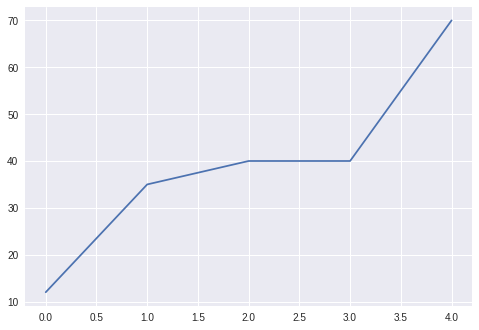

In [43]:
people["age"].plot(kind="line")



The plot above does not make much sense. By using value_counts() on a Series we get a new Series with all unique values are their count. The unique values are the index of this series. 


In [46]:
counts = people["age"].value_counts()
counts

40    2
70    1
12    1
35    1
Name: age, dtype: int64

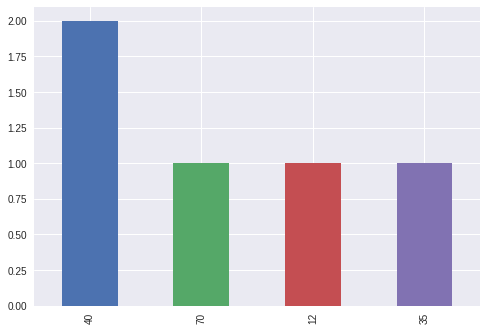

In [47]:
counts.plot(kind="bar")

# 3 Selecting data and manipulations

In [52]:
people

,name,surname,age,location
0,Peter,Pan,12,Neverland
1,Jack,Sparrow,35,Jamaica
2,Davy,Jones,40,Jamaica
3,Marco,Polo,40,Indonesia
4,Pablo,Escobar,70,Colombia


In [55]:
people[0:2] #just like in numpy

,name,surname,age,location
0,Peter,Pan,12,Neverland
1,Jack,Sparrow,35,Jamaica


In [58]:
people[0:5:2]

,name,surname,age,location
0,Peter,Pan,12,Neverland
2,Davy,Jones,40,Jamaica
4,Pablo,Escobar,70,Colombia


In [59]:
people["surname"][0:5:2]

0        Pan
2      Jones
4    Escobar
Name: surname, dtype: object

Series have behaviour similar to numpy arrays. Let's do some operations on the Series (columns). In particular, notice the broadcasting..

In [77]:
#returns another Series object. Notice broadcasting.

people["age"] > 40

0    False
1    False
2    False
3    False
4     True
Name: age, dtype: bool

In [0]:
# add a column with full name
# columns can be added on the fly (similar to a Python dictionary, where key-value pairs can be added on the fly)
# notice broadcasting

people["fullName"] = people["name"]+" "+people["surname"]

In [79]:
people.head()

,name,surname,age,location,fullName
0,Peter,Pan,12,Neverland,Peter Pan
1,Jack,Sparrow,35,Jamaica,Jack Sparrow
2,Davy,Jones,40,Jamaica,Davy Jones
3,Marco,Polo,40,Indonesia,Marco Polo
4,Pablo,Escobar,70,Colombia,Pablo Escobar


make everybody 5 years older

In [80]:

people["age"] = people["age"]+5
people.head()

,name,surname,age,location,fullName
0,Peter,Pan,17,Neverland,Peter Pan
1,Jack,Sparrow,40,Jamaica,Jack Sparrow
2,Davy,Jones,45,Jamaica,Davy Jones
3,Marco,Polo,45,Indonesia,Marco Polo
4,Pablo,Escobar,75,Colombia,Pablo Escobar


Slicing with a boolean Series is a nice way to filter your dataset

In [81]:

people["age"] > 40

0    False
1    False
2     True
3     True
4     True
Name: age, dtype: bool

In [82]:
old_people = people[people["age"] > 40]
old_people

,name,surname,age,location,fullName
2,Davy,Jones,45,Jamaica,Davy Jones
3,Marco,Polo,45,Indonesia,Marco Polo
4,Pablo,Escobar,75,Colombia,Pablo Escobar


drop a column

In [83]:
people_2 = people.drop(columns=["age","location"])
people_2.head()

,name,surname,fullName
0,Peter,Pan,Peter Pan
1,Jack,Sparrow,Jack Sparrow
2,Davy,Jones,Davy Jones
3,Marco,Polo,Marco Polo
4,Pablo,Escobar,Pablo Escobar


rename a column

In [91]:
people_renamed = people.rename(columns={"location":"country"})
people_renamed.head()

,name,surname,age,country
0,Peter,Pan,12,Neverland
1,Jack,Sparrow,35,Jamaica
2,Davy,Jones,40,Jamaica
3,Marco,Polo,40,Indonesia
4,Pablo,Escobar,70,Colombia


Drop a column (in-place)

In [92]:
people.drop(columns="age",inplace=True) #default: inplace = False
people

,name,surname,location
0,Peter,Pan,Neverland
1,Jack,Sparrow,Jamaica
2,Davy,Jones,Jamaica
3,Marco,Polo,Indonesia
4,Pablo,Escobar,Colombia


Rename a column (in-place)

In [93]:
people.rename(columns={"location":"country"},inplace=True) #default: inplace = False
people

,name,surname,country
0,Peter,Pan,Neverland
1,Jack,Sparrow,Jamaica
2,Davy,Jones,Jamaica
3,Marco,Polo,Indonesia
4,Pablo,Escobar,Colombia


**This has been a very limited overview to become familier with the concept of Pandas. We will not explore all functionality of Pandas in this notebook. During the exercises we will use Pandas to analyse real datasets.**

# 4 Exercise

In [95]:
# read the dataframe
people = pd.read_csv("/content/drive/My Drive/xylosai/intro/people.csv",header=0)
people

,name,surname,age,location
0,Peter,Pan,12,Neverland
1,Jack,Sparrow,35,Jamaica
2,Davy,Jones,40,Jamaica
3,Marco,Polo,40,Indonesia
4,Pablo,Escobar,70,Colombia


Operations on columns (Series) behave as Numpy arrays and support broadcasting.

From the age column, create a new boolean Series where each record is True if the person's age is older than 20 and younger than 60, and False otherwise.

In [111]:
boolean_series = (people["age"] < 60) & (people["age"] >20)
boolean_series

0    False
1     True
2     True
3     True
4    False
Name: age, dtype: bool

create a dataframe from the original with all people older than 20 but younger than 60

In [112]:
 
dataframe_2 = people[(people["age"] < 60) & (people["age"] >20)]
dataframe_2

,name,surname,age,location
1,Jack,Sparrow,35,Jamaica
2,Davy,Jones,40,Jamaica
3,Marco,Polo,40,Indonesia
